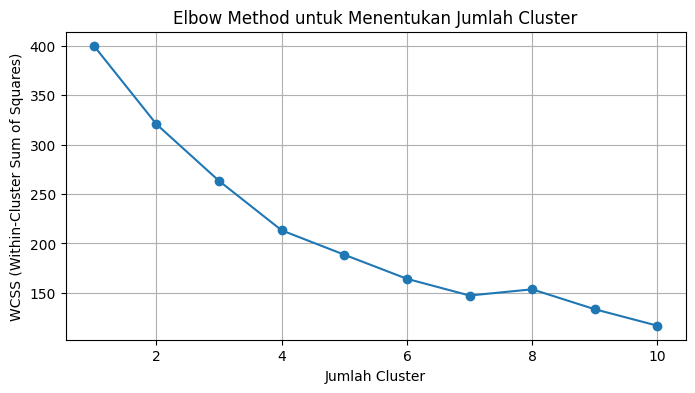

In [ ]:
# =============================================
# K-Means Clustering untuk Segmentasi Postingan
# =============================================

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulasi Data Postingan (Contoh Sintetis)
np.random.seed(42)
data = pd.DataFrame({
    'like_count': np.random.randint(0, 1000, 100),
    'share_count': np.random.randint(0, 500, 100),
    'comment_count': np.random.randint(0, 300, 100),
    'text_length': np.random.randint(20, 1000, 100)
})

# 2. Standardisasi Data (wajib untuk K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Tentukan jumlah klaster optimal (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# 4. Buat Model K-Means dengan 3 Klaster (misalnya)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['cluster'] = clusters  # tambahkan hasil klaster ke dataframe

# 5. Visualisasi hasil clustering
sns.pairplot(data, hue='cluster', palette='Set1')
plt.suptitle("Visualisasi Klaster Postingan", y=1.02)
plt.show()

# 6. Analisis hasil klaster
print("Jumlah postingan di tiap klaster:")
print(data['cluster'].value_counts())
print("\nStatistik masing-masing klaster:")
print(data.groupby('cluster').mean())
